In [2]:
import pandas as pd

In [3]:
numeros = [1,2, 3, 4, 5, 6, 7, 8, 9]

numeros = pd.Series(numeros)

In [4]:
numeros

0    1
1    2
2    3
3    4
4    5
5    6
6    7
7    8
8    9
dtype: int64

In [5]:
data = {
    'nombre': ['Julian', 'Gabriela', 'Matias', 'Martha', 'Estella', 'Camilo'],
    'Edad': [32, 37, 10, 53, 62, 25],
    'Ciudad': ['Copacabana', 'Medellin', 'Envigado', 'Itagui', 'Sabaneta', 'Bello']
}

df = pd.DataFrame(data)
print(df)

     nombre  Edad      Ciudad
0    Julian    32  Copacabana
1  Gabriela    37    Medellin
2    Matias    10    Envigado
3    Martha    53      Itagui
4   Estella    62    Sabaneta
5    Camilo    25       Bello


In [6]:
#Exportar DataFrame

df.to_csv("data.csv")

In [7]:
#Importar DataFrame
#Index_col nos permite eliminar columna que se crea automaticamente

dfImport = pd.read_csv("data.csv", index_col=0)

dfImport

,nombre,Edad,Ciudad
0,Julian,32,Copacabana
1,Gabriela,37,Medellin
2,Matias,10,Envigado
3,Martha,53,Itagui
4,Estella,62,Sabaneta
5,Camilo,25,Bello


In [8]:
# Seleccionar una columna del DataFrame

nombres = df["nombre"]
print(nombres)

0      Julian
1    Gabriela
2      Matias
3      Martha
4     Estella
5      Camilo
Name: nombre, dtype: object


In [9]:
# Seleccionar varias columnas del DataFrame

varios = df[['nombre','Edad']]
varios

,nombre,Edad
0,Julian,32
1,Gabriela,37
2,Matias,10
3,Martha,53
4,Estella,62
5,Camilo,25


In [10]:
# Filtrar por fila 

fila = df.loc[2]
fila

nombre      Matias
Edad            10
Ciudad    Envigado
Name: 2, dtype: object

In [11]:
# Filtrar por Condiciones

edades = df[df['Edad'] > 50]
edades

,nombre,Edad,Ciudad
3,Martha,53,Itagui
4,Estella,62,Sabaneta


In [12]:
# Para usar dos filtros

filtros = (df['Edad'] > 50) & (df["nombre"].str.startswith("M"))
df[filtros]

,nombre,Edad,Ciudad
3,Martha,53,Itagui


In [14]:
# Filtrar por Query

df.query("Edad < 50")


,nombre,Edad,Ciudad
0,Julian,32,Copacabana
1,Gabriela,37,Medellin
2,Matias,10,Envigado
5,Camilo,25,Bello


In [15]:
# Filtrar los datos de personas especificando un campo

df[df["nombre"].isin(["Julian", "Matias"])]

,nombre,Edad,Ciudad
0,Julian,32,Copacabana
2,Matias,10,Envigado


In [18]:
# Aplicar una funcion para realizar un filtro

def longitud(nombre):
    return len(nombre) == 6

df[df["nombre"].apply(longitud)]

,nombre,Edad,Ciudad
0,Julian,32,Copacabana
2,Matias,10,Envigado
3,Martha,53,Itagui
5,Camilo,25,Bello


In [19]:
# Realizar filtros con dos condiciones

df[df["Edad"].between(25,35)]

,nombre,Edad,Ciudad
0,Julian,32,Copacabana
5,Camilo,25,Bello


In [20]:
df

,nombre,Edad,Ciudad
0,Julian,32,Copacabana
1,Gabriela,37,Medellin
2,Matias,10,Envigado
3,Martha,53,Itagui
4,Estella,62,Sabaneta
5,Camilo,25,Bello


In [21]:
import numpy as np

In [25]:
dt = {'nombre': ['Julian', 'Gabriela', 'Matias', 'Martha', 'Estella', 'Camilo'],
    'Edad': [32, 37, np.nan, 53, 62, 25],
    'Ciudad': ['Copacabana', 'Medellin', 'Envigado', 'Itagui', None, 'Bello']}

df = pd.DataFrame(dt)

In [26]:
df

,nombre,Edad,Ciudad
0,Julian,32.0,Copacabana
1,Gabriela,37.0,Medellin
2,Matias,NaN,Envigado
3,Martha,53.0,Itagui
4,Estella,62.0,None
5,Camilo,25.0,Bello


In [29]:
# Rellenar valores faltantes

dfFill = df.fillna(
    {
    'Edad': df["Edad"].mean(),
    'Ciudad': 'Desconocido'
}
)

dfFill

,nombre,Edad,Ciudad
0,Julian,32.0,Copacabana
1,Gabriela,37.0,Medellin
2,Matias,41.8,Envigado
3,Martha,53.0,Itagui
4,Estella,62.0,Desconocido
5,Camilo,25.0,Bello


In [30]:
# Eliminar filas con valores faltantes

dfSin = df.dropna()

dfSin

,nombre,Edad,Ciudad
0,Julian,32.0,Copacabana
1,Gabriela,37.0,Medellin
3,Martha,53.0,Itagui
5,Camilo,25.0,Bello


In [34]:
# Reemplazar valores especificos de alguna columna

dfR = df.replace({
    "Ciudad": {None: "Desconocido"}
})

dfR

,nombre,Edad,Ciudad
0,Julian,32.0,Copacabana
1,Gabriela,37.0,Medellin
2,Matias,NaN,Envigado
3,Martha,53.0,Itagui
4,Estella,62.0,Desconocido
5,Camilo,25.0,Bello


In [35]:
# Interpolar Valores

dfI = df.copy()
dfI["Edad"] = df["Edad"].interpolate()
dfI

,nombre,Edad,Ciudad
0,Julian,32.0,Copacabana
1,Gabriela,37.0,Medellin
2,Matias,45.0,Envigado
3,Martha,53.0,Itagui
4,Estella,62.0,None
5,Camilo,25.0,Bello


In [39]:
dataDuplicado = {'nombre': ['Julian', 'Gabriela', 'Matias', 'Martha', 'Julian', 'Gabriela'],
    'Edad': [32, 37, np.nan, 53, 32, 37],
    'Ciudad': ['Copacabana', 'Medellin', 'Envigado', 'Itagui', 'Copacabana', 'Medellin']}

dataDuplicado = pd.DataFrame(dataDuplicado)

dataDuplicado

,nombre,Edad,Ciudad
0,Julian,32.0,Copacabana
1,Gabriela,37.0,Medellin
2,Matias,NaN,Envigado
3,Martha,53.0,Itagui
4,Julian,32.0,Copacabana
5,Gabriela,37.0,Medellin


In [41]:
# Eliminar datos duplicados

dfSinD = dataDuplicado.drop_duplicates()

dfSinD

,nombre,Edad,Ciudad
0,Julian,32.0,Copacabana
1,Gabriela,37.0,Medellin
2,Matias,NaN,Envigado
3,Martha,53.0,Itagui


In [46]:
# Renombrar columnas 

dfR  = df.rename(columns={
    "nombre": "Name",
    "Edad": "Age",
    "Ciudad": "City"
})

dfR

,Name,Age,City
0,Julian,32.0,Copacabana
1,Gabriela,37.0,Medellin
2,Matias,NaN,Envigado
3,Martha,53.0,Itagui
4,Estella,62.0,None
5,Camilo,25.0,Bello


In [47]:
# Organizar Columnas

columnas = ["City", "Name", "Age"]

dfO = dfR[columnas]

dfO

,City,Name,Age
0,Copacabana,Julian,32.0
1,Medellin,Gabriela,37.0
2,Envigado,Matias,NaN
3,Itagui,Martha,53.0
4,None,Estella,62.0
5,Bello,Camilo,25.0


In [51]:
# Transformacion de Datos

def cuadrado(x):
    return x * 2

df["EdadDoble"] = df["Edad"].apply(cuadrado)

df


,nombre,Edad,Ciudad,EdadDoble
0,Julian,32.0,Copacabana,64.0
1,Gabriela,37.0,Medellin,74.0
2,Matias,NaN,Envigado,NaN
3,Martha,53.0,Itagui,106.0
4,Estella,62.0,None,124.0
5,Camilo,25.0,Bello,50.0


In [52]:
columas = ["nombre", "Ciudad", "Edad", "EdadDoble"]

df = df[columas]

df

,nombre,Ciudad,Edad,EdadDoble
0,Julian,Copacabana,32.0,64.0
1,Gabriela,Medellin,37.0,74.0
2,Matias,Envigado,NaN,NaN
3,Martha,Itagui,53.0,106.0
4,Estella,None,62.0,124.0
5,Camilo,Bello,25.0,50.0


In [55]:
data2 = {
    "Nombre": ['Julian', 'Gabriela', 'Matias', 'Martha', 'Estella', 'Roberto'],
    'Ciudad': ['Copacabana', 'Medellin', 'Envigado', 'Envigado', 'Medellin', 'Envigado'],
    "Edad": [32, 37, 10, 54, 63, 44],
    "Puntuacion": [80, 90, 75, 62, 88, 95]
}

data2 = pd.DataFrame(data2)

data2

,Nombre,Ciudad,Edad,Puntuacion
0,Julian,Copacabana,32,80
1,Gabriela,Medellin,37,90
2,Matias,Envigado,10,75
3,Martha,Envigado,54,62
4,Estella,Medellin,63,88
5,Roberto,Envigado,44,95


In [58]:
# Agrupacion de Datos

grupo = data2.groupby("Ciudad")

print(grupo.groups)

{'Copacabana': [0], 'Envigado': [2, 3, 5], 'Medellin': [1, 4]}


In [59]:
# Suma de las ciudades y puntuaciones por Ciudad

aggre = grupo.agg({
    "Edad": "mean", #Promedio
    "Puntuacion": "sum" # Suma
})

aggre

,Edad,Puntuacion
Ciudad,,
Copacabana,32.0,80
Envigado,36.0,232
Medellin,50.0,178


In [62]:
# Definir funciones propias

def rango (serie):
    return serie.max() - serie.min()

# Aplicar funcion 

custom = grupo.agg({
    "Edad": rango,
    "Puntuacion": rango
})

custom

,Edad,Puntuacion
Ciudad,,
Copacabana,0,0
Envigado,44,33
Medellin,26,2


In [63]:
# Agregar una nueva columna y filas

data2["Categoria"] = ["A", "B", "A", "A", "B", "B"]

df = pd.DataFrame(data2)

df

,Nombre,Ciudad,Edad,Puntuacion,Categoria
0,Julian,Copacabana,32,80,A
1,Gabriela,Medellin,37,90,B
2,Matias,Envigado,10,75,A
3,Martha,Envigado,54,62,A
4,Estella,Medellin,63,88,B
5,Roberto,Envigado,44,95,B


In [64]:
# Agrupar datos por Ciudad y Categoria

multi = df.groupby(["Ciudad", "Categoria"])

multi.groups

{('Copacabana', 'A'): [0], ('Envigado', 'A'): [2, 3], ('Envigado', 'B'): [5], ('Medellin', 'B'): [1, 4]}

In [65]:
# Caluclar la suma de las edades y puntuacion, por ciudad y categoria

multi2 = multi.agg({
    "Edad": "sum",
    "Puntuacion": "mean"
})

multi2

Edad  Puntuacion
Ciudad     Categoria                  
Copacabana A            32        80.0
Envigado   A            64        68.5
           B            44        95.0
Medellin   B           100        89.0

In [70]:
# Agregar una nueva Columna

data3 = {
    "Nombre": ["Julian", "Matias", "Gabriela"],
    "Edad": [32, 10, 37]
}

df = pd.DataFrame(data3)

df

,Nombre,Edad
0,Julian,32
1,Matias,10
2,Gabriela,37


In [74]:
df["Ciudad"] = ["Copacabana", "Envigado", "Medellin"]

df

ValueError: Length of values (3) does not match length of index (5)

In [75]:
# Generamos una nueva Fila

nCol = pd.Series({
    "Nombre": "Martha",
    "Edad": 54,
    "Ciudad": "Bello"
})

# Agregamos una nueva Fila

df = pd.concat([df, nCol.to_frame().T], ignore_index=True)

df

,Nombre,Edad,Ciudad
0,Julian,32,Copacabana
1,Matias,10,Envigado
2,Gabriela,37,Medellin
3,Martha,54,Bello
4,Martha,54,Bello
5,Martha,54,Bello


In [79]:
# Creamos 2 Dataframe

data3 = {
    "Nombre": ["Julian", "Matias", "Gabriela"],
    "Edad": [32, 10, 37]
}

df1 = pd.DataFrame(data3)

df1

data4 = {
    "Nombre": ["Roberto", "Marta", "Kike"],
    "Edad": [75, 54, 48]
}

df2 = pd.DataFrame(data4)

df2


,Nombre,Edad
0,Roberto,75
1,Marta,54
2,Kike,48


In [80]:
df1

,Nombre,Edad
0,Julian,32
1,Matias,10
2,Gabriela,37


In [81]:
df2

,Nombre,Edad
0,Roberto,75
1,Marta,54
2,Kike,48


In [82]:
# Combinamos los dos Dataframe atraves del metodo concat

combinacion = pd.concat([df1, df2], ignore_index=True)

combinacion

,Nombre,Edad
0,Julian,32
1,Matias,10
2,Gabriela,37
3,Roberto,75
4,Marta,54
5,Kike,48


In [83]:
import numpy as np

In [88]:
# Arreglo de 1 dimension

arr1 = np.array([1, 2, 3, 4, 5, 6])

print(arr1) # Imprime Arreglo
print(arr1.shape) # Longitud arreglo
print(arr1.dtype) # Tipo de Dato arreglo

[1 2 3 4 5 6]
(6,)
int32


In [90]:
# Arreglo de 2x3 modificando uno existente, aplica para cualquier tipo de arreglo

arr2 = arr1.reshape((3,2))

print(arr2)


[[1 2]
 [3 4]
 [5 6]]


In [91]:
# Matriz de 4x4 con numeros aleatorios

mat1 = np.random.rand(4,4)

print(mat1)

[[0.71910868 0.068151   0.22277363 0.73139061]
 [0.8136338  0.50178074 0.77349286 0.98876309]
 [0.56766377 0.31967625 0.13473998 0.3319293 ]
 [0.95010047 0.24345859 0.42698545 0.44192323]]


In [93]:
# Arreglo de 2 Dimensiones apartir de una Lista de Listas

arr = np.array([[1,2,3], [4,5,6], [7,8,9]])

print(arr)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [96]:
unos = np.ones((2,2))

unos[1,1] = 2 # Modifico el valor que deseo pasando la coordenada del arrary

print(unos)

[[1. 1.]
 [1. 2.]]


In [97]:
# Arreglo de 3 Dimensiones

arr = np.zeros((2,3,4))

print(arr)

[[[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]]


In [98]:
arr1 = np.array([[1,2], [4,5]])
arr2 = np.array([[6,7], [8,9]])
print(arr1)
print(arr2)

[[1 2]
 [4 5]]
[[6 7]
 [8 9]]


In [100]:
# Concatenar Array Horizontalmente
arrH = np.hstack((arr1, arr2))

arrH

array([[1, 2, 6, 7],
       [4, 5, 8, 9]])

In [101]:
# Concatenar Array Verticalmente

arrV = np.vstack((arr1, arr2))

arrV

array([[1, 2],
       [4, 5],
       [6, 7],
       [8, 9]])

In [102]:
arr = np.array([1,2,3,4,5])

print(arr)

[1 2 3 4 5]


In [103]:
# Calcular la Suma de los elementos

sum = np.sum(arr)

sum

15

In [105]:
# Calcular el promedio

prom = np.mean(arr)

prom

3.0

In [106]:
# Minimo de los elementos

min = np.min(arr)

min

1

In [107]:
# Maximo de los elementos

max = np.max(arr)

max

5

In [108]:
# Suma de dos array

arr + arr

array([ 2,  4,  6,  8, 10])

In [112]:
# Arreglo con Numpy

data = np.array([[1,2,3],[4,5,6],[7,8,9]])

print(data)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [113]:
# Dataframe con Pandas

df = pd.DataFrame(data, columns=["A", "B", "C"])

df

,A,B,C
0,1,2,3
1,4,5,6
2,7,8,9


In [114]:
# Creamos Dataframe 

data2 = {
    "A": [9,4,1],
    "B": [7,2,5],
    "C": [3,8,0]
}

df = pd.DataFrame(data2)

df

,A,B,C
0,9,7,3
1,4,2,8
2,1,5,0


In [115]:
# Convertimos en Array

arr = df.to_numpy()

arr

array([[9, 7, 3],
       [4, 2, 8],
       [1, 5, 0]], dtype=int64)

In [116]:
df

,A,B,C
0,9,7,3
1,4,2,8
2,1,5,0


In [117]:
# Promedio de cada columna utilizando Numpy(Columnas)

prom = np.mean(df, axis=0)

prom

A    4.666667
B    4.666667
C    3.666667
dtype: float64

In [118]:
# Promedio de cada columna utilizando Numpy(Filas)

prom = np.mean(df, axis=1)

prom

0    6.333333
1    4.666667
2    2.000000
dtype: float64

In [119]:
# Matplotlib

import matplotlib.pyplot as plt

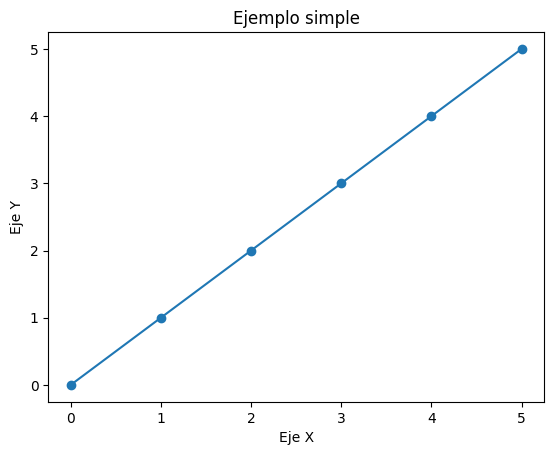

In [127]:
# Ejemplo simple

x = [0, 1, 2, 3, 4, 5]

y = [0, 1, 2, 3, 4, 5]

plt.plot(x, y)
plt.scatter(x, y)
plt.xlabel("Eje X")
plt.ylabel("Eje Y")
plt.title("Ejemplo simple")
plt.show()

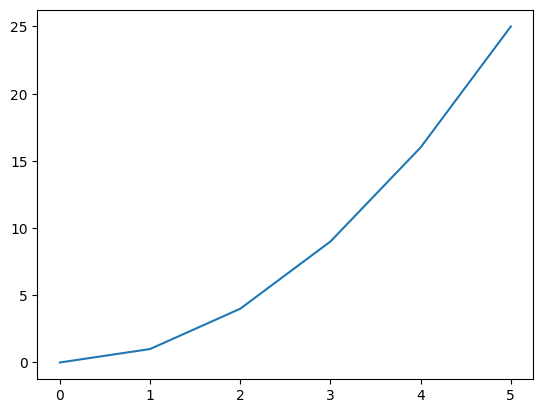

In [123]:
# Ejemplo simple

x = [0, 1, 2, 3, 4, 5]

y = [0, 1, 4, 9, 16, 25]

plt.plot(x, y)

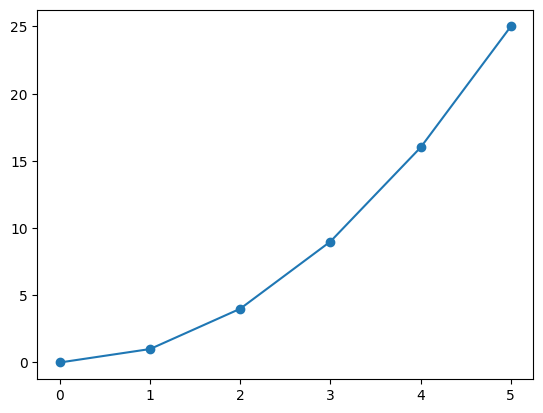

In [125]:
# Ejemplo simple

x = [0, 1, 2, 3, 4, 5]

y = [0, 1, 4, 9, 16, 25]

plt.plot(x, y)
plt.scatter(x, y)

Text(0.5, 1.0, 'Tabla')

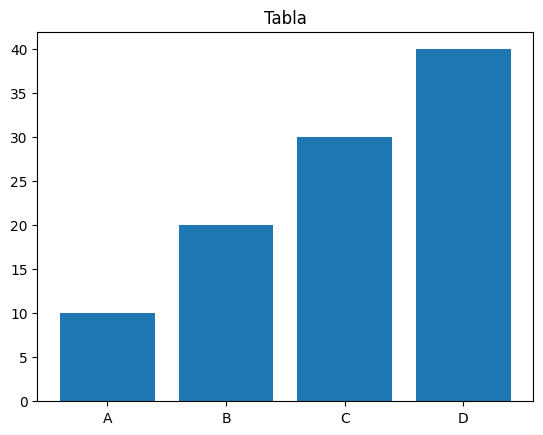

In [128]:
# Graficos de Barras

categorias = ["A", "B", "C", "D"]

valores = [10, 20, 30, 40]

plt.bar(categorias, valores)
plt.title("Tabla")



In [129]:
import seaborn as sns

In [130]:
data = sns.load_dataset("iris")
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


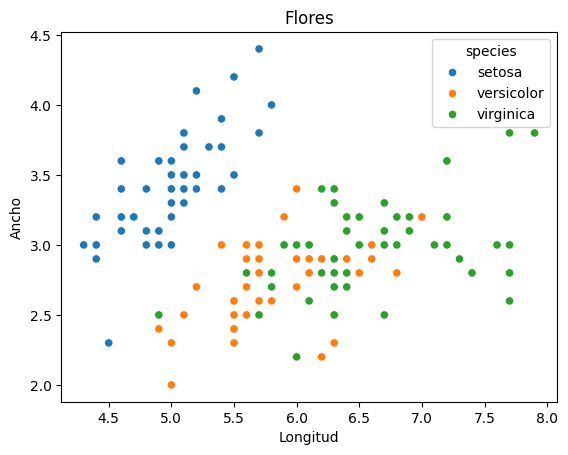

In [131]:
# Grafica Dispersion

sns.scatterplot(x="sepal_length", y="sepal_width", hue="species", data=data)
plt.xlabel("Longitud")
plt.ylabel("Ancho")
plt.title("Flores")
plt.show()

